# **Import Libaraies**

In [453]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import seaborn as sns
from sklearn.svm import SVC
#loading all the dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)
import plotly.express as px

## **INSERT THE DATA SET**

In [454]:
df=pd.read_csv('/content/sample_data/kidney_disease.csv')

In [455]:
df.drop("id", axis=1, inplace=True)

In [456]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [457]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'classs']

In [458]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classs
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [460]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [462]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [463]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['classs'] = df['classs'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [464]:
df['classs'] = df['classs'].map({'ckd': 0, 'not ckd': 1})
df['classs'] = pd.to_numeric(df['classs'], errors='coerce')

In [465]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'classs']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

classs has [0 1] values



# **EDA**

In [466]:
def kde(col):
    grid = sns.FacetGrid(df, hue="classs", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="classs", template = 'plotly_dark')
    return fig.show()

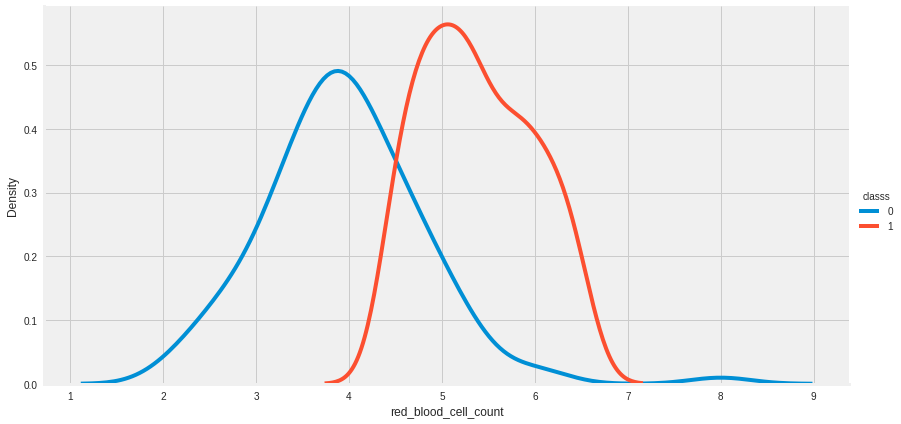

In [467]:
kde('red_blood_cell_count')

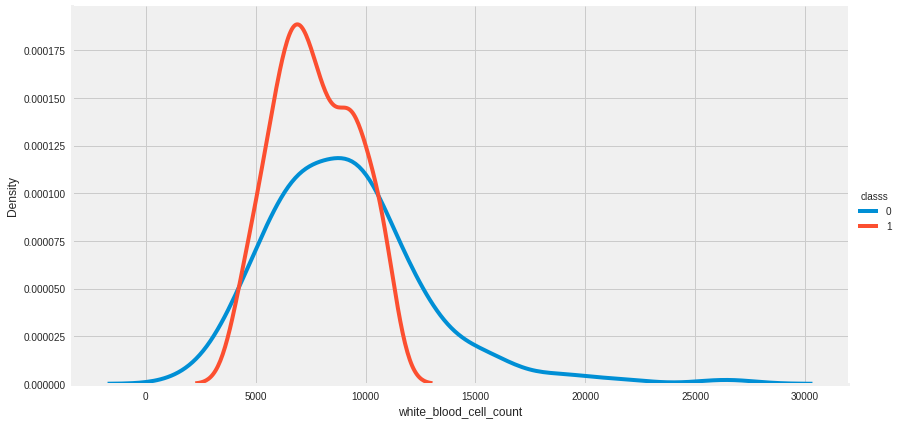

In [468]:
kde('white_blood_cell_count')

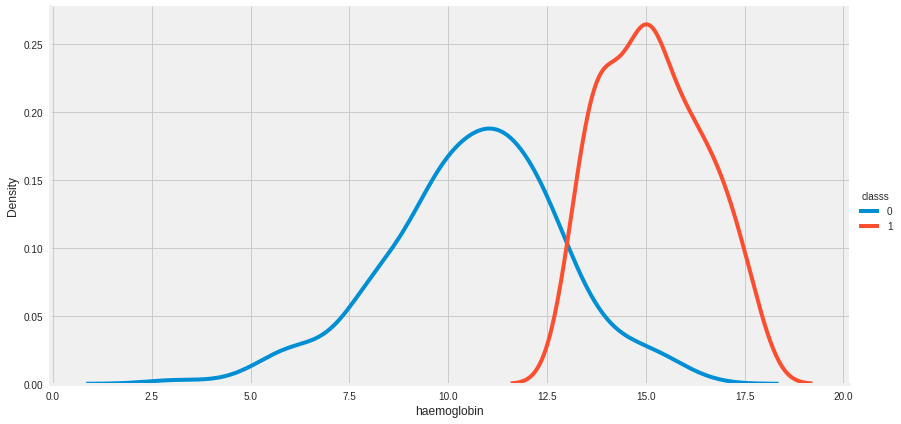

In [469]:
kde('haemoglobin')

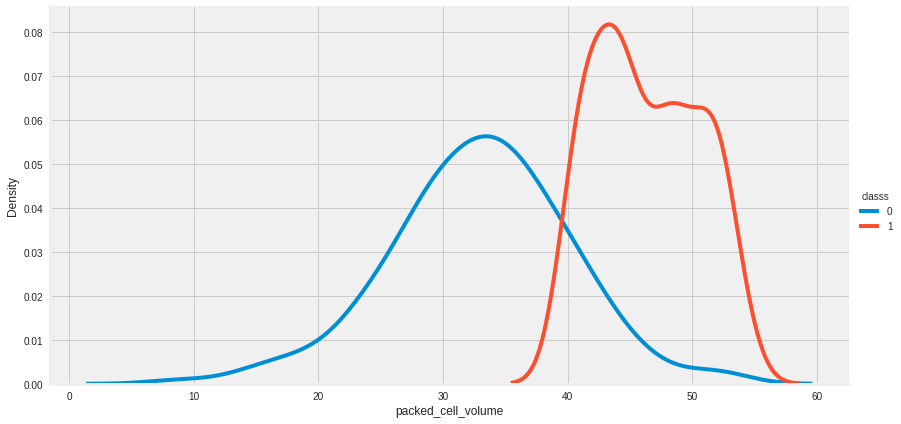

In [470]:
kde('packed_cell_volume')

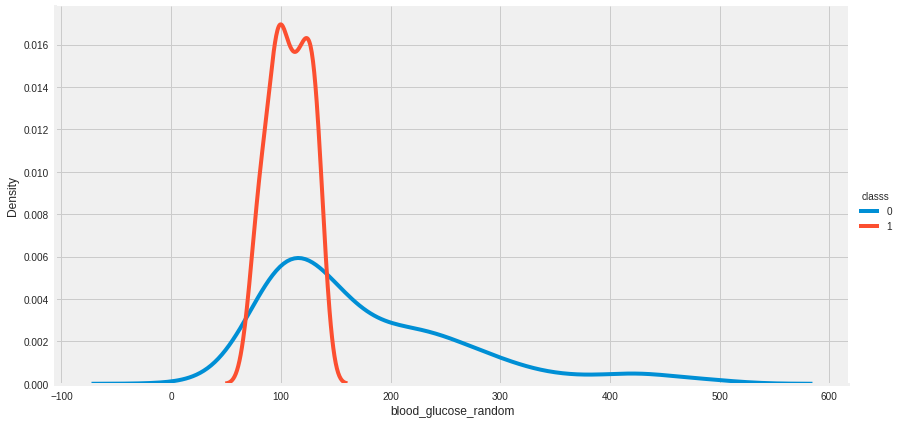

In [471]:
kde('blood_glucose_random')

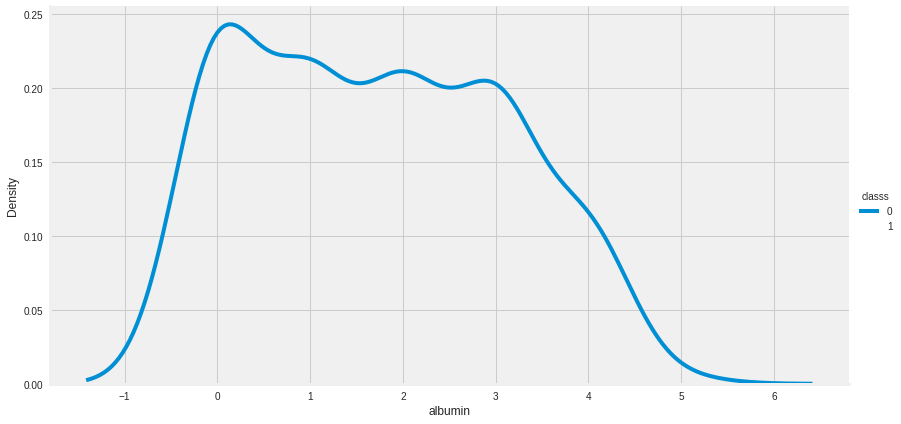

In [472]:
kde('albumin')

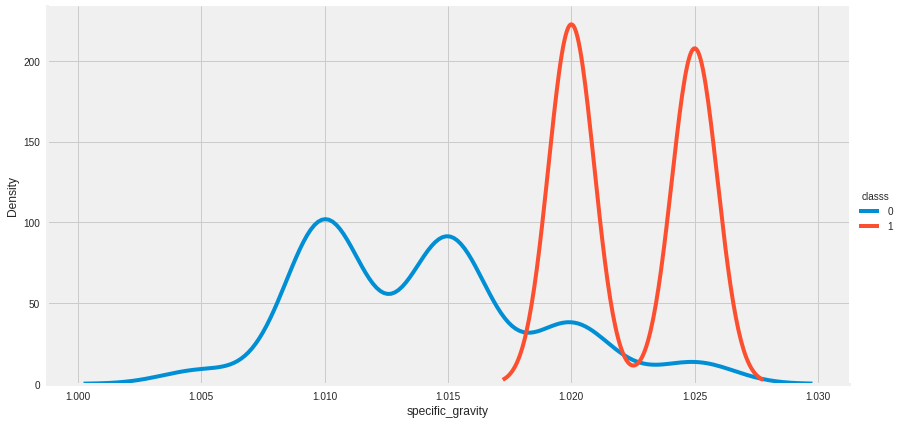

In [473]:
kde('specific_gravity')

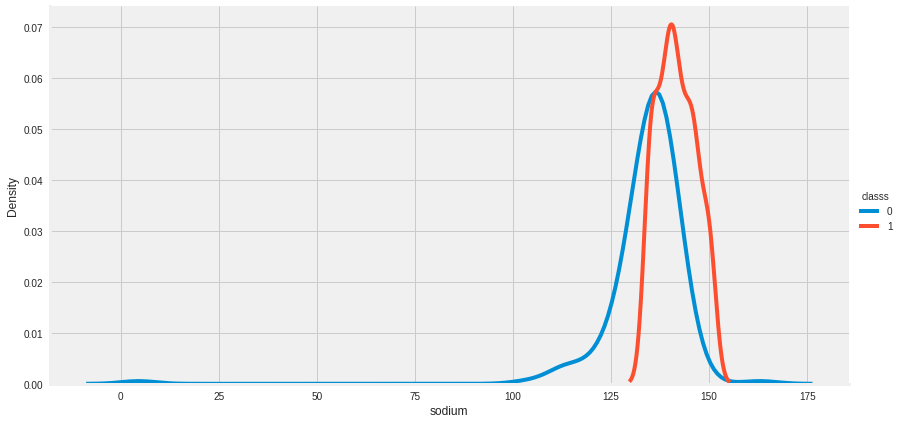

In [474]:
kde('sodium')

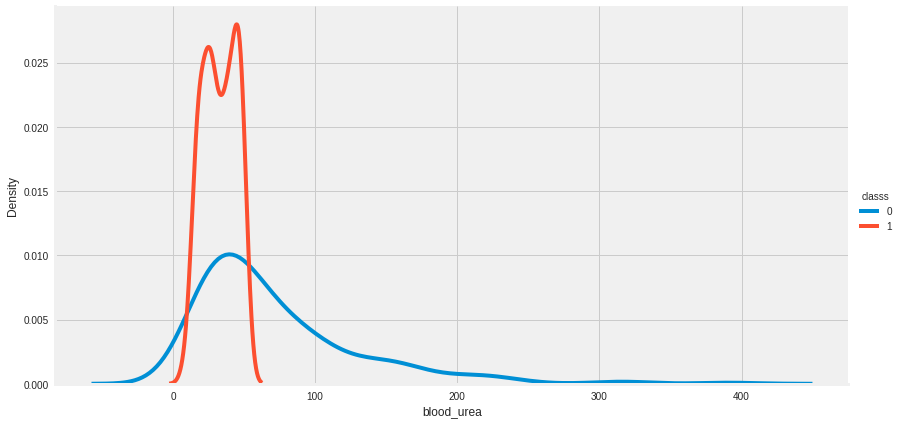

In [475]:
kde('blood_urea')

In [476]:
scatter('red_blood_cell_count', 'albumin')

In [477]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [478]:
scatter('packed_cell_volume','blood_urea')

In [479]:
px.bar(df, x="specific_gravity", y="albumin", color='classs', barmode='group', template = 'plotly_dark', height = 400)

In [480]:
px.bar(df, x="blood_pressure", y="packed_cell_volume", color='classs', barmode='group', template = 'plotly_dark', height = 400)

In [481]:
px.bar(df, x="specific_gravity", y="packed_cell_volume", color='classs', barmode='group', template = 'plotly_dark', height = 400)

In [482]:
df.shape

(400, 25)

In [483]:
df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classs                       0
dtype: int64

In [484]:
missing=df.isna().sum().sort_values(ascending=False)
print(missing)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classs                       0
dtype: int64


In [485]:
from matplotlib import style

In [486]:
style.use("dark_background")

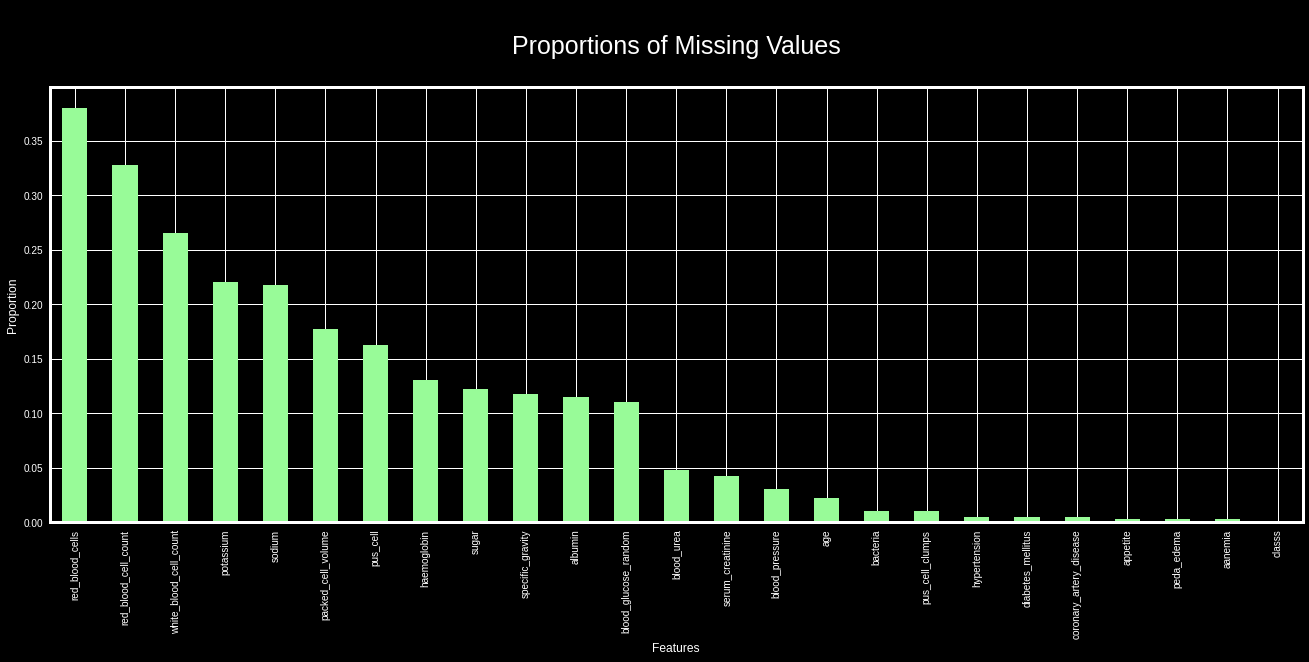

In [487]:
plt.figure(figsize=(20,8))
(missing/400).plot(kind="bar", color="palegreen") #400 is the number of patients/rows/examples/observations/lines in our data
#The "missing" variable contains the numbers of missing values, so we divide by 400 to get the proportions.
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

In [488]:
df.dropna().shape

(158, 25)

In [489]:
numerical=[]
for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
print(numerical)

['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [490]:
categorical=[]
for col in df.columns:
    if df[col].dtype=="object":
        categorical.append(col)
print(categorical)

['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia']


In [491]:
for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [493]:
from sklearn.preprocessing import LabelEncoder

In [494]:
encoder = LabelEncoder()

In [495]:
for col in categorical:
    df[col]=encoder.fit_transform(df[col])

In [496]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classs
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


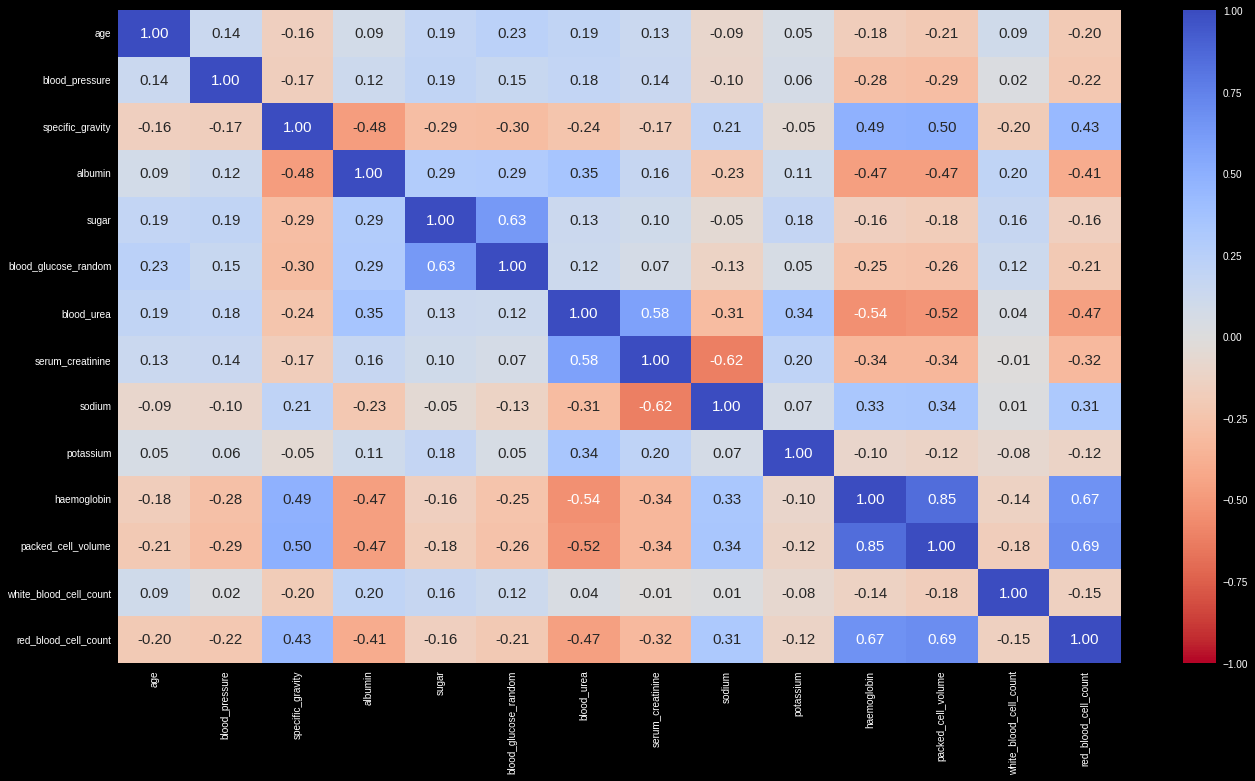

In [497]:
correlation_matrix = df[numerical].corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, cmap="coolwarm_r",annot_kws={'fontsize':15}, fmt=".2f", annot=True, vmin=-1, vmax=1)
plt.show()

# **SPLIT THE DATA INTO TRAIN AND TEST**

In [498]:
from sklearn.model_selection import train_test_split

In [499]:
X_train,X_test,y_train,y_test=train_test_split(df[['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'classs']],df.classs,test_size=0.2)

# **Logistic regression**

In [500]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs',max_iter=2000)

In [501]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [502]:
lr_acc_score=model.score(X_test,y_test)

In [503]:
lr_acc_score

1.0

In [504]:
y_pred_logistic_reg=model.predict(X_test)
print(classification_report(y_test,y_pred_logistic_reg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        29

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Axes: >

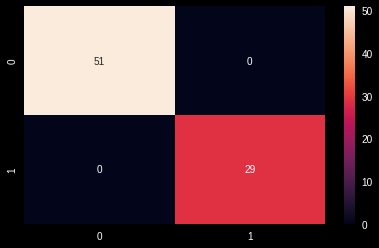

In [505]:
sns.heatmap(confusion_matrix(y_test, y_pred_logistic_reg), annot = True)

# Decision **Tree**

In [506]:
from sklearn import tree

In [507]:
model2=tree.DecisionTreeClassifier()
model2

DecisionTreeClassifier()

In [508]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [509]:
dt_acc_score=model2.score(X_test,y_test)

In [510]:
dt_acc_score

1.0

In [511]:
y_pred_ds=model2.predict(X_test)
print(classification_report(y_test,y_pred_ds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        29

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Axes: >

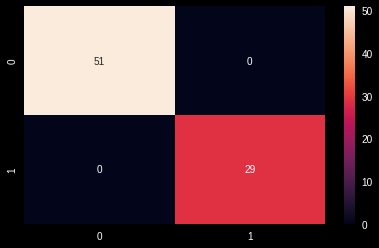

In [512]:
sns.heatmap(confusion_matrix(y_test, y_pred_ds), annot = True)

## **SVM**

In [513]:
from sklearn.svm import SVC

In [514]:
model3=SVC(kernel='linear',probability=True)

In [515]:
model3.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [516]:
svc_acc_score=model3.score(X_test,y_test)

In [517]:
svc_acc_score

1.0

In [518]:
y_pred_sk=model3.predict(X_test)
print(classification_report(y_test,y_pred_sk))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        29

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Axes: >

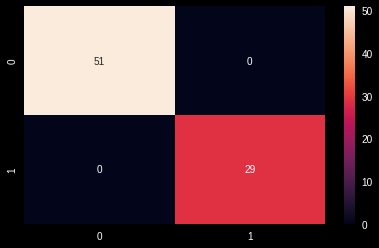

In [519]:
sns.heatmap(confusion_matrix(y_test, y_pred_sk), annot = True)

#NAIVES BAYES


In [520]:
from sklearn.naive_bayes import GaussianNB

In [521]:
model5=GaussianNB()

In [522]:
model5.fit(X_train,y_train)

GaussianNB()

In [523]:
nb_acc_score=model5.score(X_test,y_test)

In [524]:
nb_acc_score

1.0

In [525]:
y_pred_gs=model5.predict(X_test)
print(classification_report(y_test,y_pred_gs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        29

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Axes: >

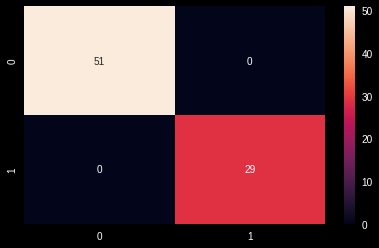

In [526]:
sns.heatmap(confusion_matrix(y_test, y_pred_gs), annot = True)

# XGB 


In [527]:
model6=XGBClassifier()

In [528]:
model6.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [529]:
xgb_acc_score=model6.score(X_test,y_test)

In [530]:
xgb_acc_score

1.0

In [531]:
y_pred_xgb=model6.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        29

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Axes: >

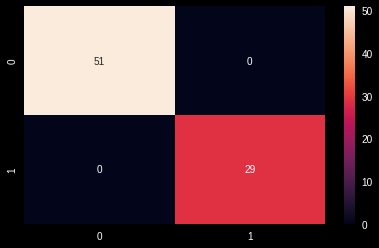

In [532]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot = True)

# **STATS**

In [533]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Extreme Gradient Boost','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,xgb_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,100.0
1,Naive Bayes,100.0
2,Extreme Gradient Boost,100.0
3,Decision Tree,100.0
4,Support Vector Machine,100.0


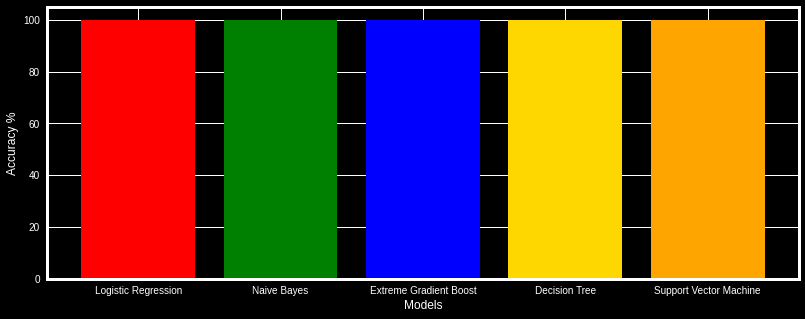

In [534]:
colors = ['red','green','blue','gold','orange',]
plt.figure(figsize=(12,5))
# plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Models")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# **ROC CURVE**

In [535]:
pred_prob1 = model.predict_proba(X_test)
pred_prob1[:,1]

array([1.79203357e-03, 4.85750161e-02, 6.77038331e-03, 9.94453442e-01,
       2.70757461e-02, 9.95721401e-01, 6.16436832e-05, 9.99527879e-01,
       1.01006210e-14, 9.81777067e-01, 5.23739896e-05, 9.99484248e-01,
       2.23221693e-10, 2.65045679e-06, 9.98019270e-01, 2.50055787e-03,
       9.46971941e-01, 5.90018207e-09, 2.28442256e-06, 2.05649005e-02,
       9.58276629e-01, 4.26562753e-03, 4.61863167e-02, 9.94219152e-01,
       9.79482576e-01, 2.14202414e-03, 9.90429624e-01, 9.92046523e-01,
       3.33423677e-02, 2.97105487e-03, 4.35291589e-03, 4.49561778e-07,
       1.15735114e-05, 2.33947109e-02, 9.84640913e-01, 2.08111012e-04,
       3.65674288e-16, 9.70893466e-01, 9.99122538e-01, 9.54609022e-01,
       9.81286123e-01, 5.81488473e-04, 9.94753084e-01, 9.98676673e-01,
       6.23791808e-08, 9.95126478e-01, 8.25621709e-01, 9.99215548e-01,
       6.70417001e-10, 1.78002136e-13, 3.08813673e-04, 9.99467589e-01,
       1.00036590e-04, 9.93501753e-01, 1.47413378e-01, 5.00884348e-08,
      

In [536]:
pred_prob2 = model2.predict_proba(X_test)
pred_prob2[:,1]

array([0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.])

In [537]:
pred_prob3 = model3.predict_proba(X_test)
pred_prob3[:,1]

array([9.47609570e-05, 1.80701881e-02, 9.61462063e-02, 9.94242295e-01,
       1.65925430e-03, 9.92005596e-01, 8.12411169e-04, 9.99999770e-01,
       1.00000010e-07, 9.87091790e-01, 1.41660669e-05, 9.99998852e-01,
       1.00000010e-07, 7.32342478e-06, 9.96376976e-01, 4.15124526e-02,
       9.89325503e-01, 1.51111593e-07, 1.70617106e-05, 2.20568168e-02,
       7.98118658e-01, 1.43087934e-03, 1.88416906e-01, 9.79714021e-01,
       9.93407087e-01, 1.14310413e-04, 9.72848471e-01, 9.74489643e-01,
       2.59572947e-04, 9.96684498e-02, 8.80650524e-03, 2.88587078e-06,
       3.33137931e-05, 6.09490727e-02, 9.77998809e-01, 6.36791921e-05,
       1.00000010e-07, 9.53977988e-01, 9.99998204e-01, 8.87490816e-01,
       9.30608486e-01, 1.52735178e-03, 9.97161899e-01, 9.99999872e-01,
       8.63371353e-05, 9.97305549e-01, 5.60174266e-01, 9.99998904e-01,
       1.00000010e-07, 1.00000010e-07, 1.17809750e-01, 9.99999177e-01,
       1.75467562e-02, 9.74805476e-01, 8.93307315e-02, 1.00000010e-07,
      

In [538]:
pred_prob5 = model5.predict_proba(X_test)
pred_prob5[:,1]

array([0.00000000e+000, 1.42342035e-059, 6.28649239e-118, 1.00000000e+000,
       0.00000000e+000, 1.00000000e+000, 0.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 1.00000000e+000, 7.99578218e-237, 1.00000000e+000,
       9.31222552e-280, 0.00000000e+000, 1.00000000e+000, 5.72546347e-190,
       1.00000000e+000, 0.00000000e+000, 2.03048992e-146, 2.20815509e-029,
       1.00000000e+000, 3.68074644e-155, 9.71007156e-124, 1.00000000e+000,
       1.00000000e+000, 1.00970031e-155, 1.00000000e+000, 1.00000000e+000,
       7.38135163e-134, 1.79006221e-161, 6.46665711e-156, 0.00000000e+000,
       1.94119640e-153, 1.12373933e-060, 1.00000000e+000, 2.22274472e-111,
       0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 8.12890824e-131, 1.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
       8.27280408e-197, 1

In [539]:
pred_prob6 = model6.predict_proba(X_test)
pred_prob6[:,1]

array([0.00454333, 0.00454333, 0.00582619, 0.9923693 , 0.00454333,
       0.9923693 , 0.00454333, 0.9923693 , 0.00454333, 0.9923693 ,
       0.00454333, 0.9923693 , 0.00454333, 0.00454333, 0.9923693 ,
       0.00582619, 0.9923693 , 0.00454333, 0.00454333, 0.00454333,
       0.9923693 , 0.00454333, 0.00454333, 0.9923693 , 0.9923693 ,
       0.00454333, 0.9923693 , 0.9923693 , 0.00454333, 0.00454333,
       0.00454333, 0.00454333, 0.00454333, 0.00454333, 0.9923693 ,
       0.00454333, 0.00454333, 0.9923693 , 0.9923693 , 0.9923693 ,
       0.9923693 , 0.00454333, 0.9923693 , 0.9923693 , 0.00454333,
       0.9923693 , 0.9923693 , 0.9923693 , 0.00454333, 0.00454333,
       0.00582619, 0.9923693 , 0.00454333, 0.9923693 , 0.00454333,
       0.00454333, 0.9923693 , 0.00454333, 0.00454333, 0.00454333,
       0.00454333, 0.00454333, 0.9923693 , 0.00454333, 0.00454333,
       0.9923693 , 0.00454333, 0.00454333, 0.00454333, 0.00454333,
       0.00454333, 0.00454333, 0.00454333, 0.00454333, 0.99236

In [540]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score1

1.0

In [541]:
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score2

1.0

In [542]:
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score3

1.0

In [543]:
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score5

1.0

In [544]:
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
auc_score6

1.0

In [545]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

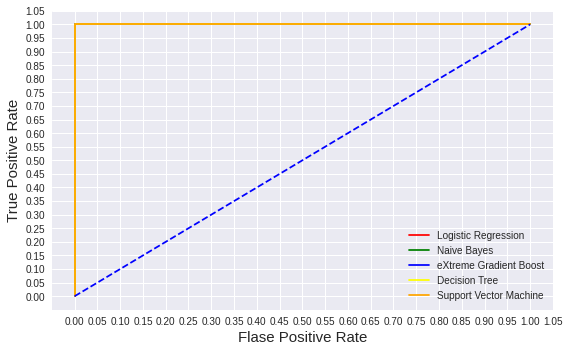

In [546]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
# plt.plot(fpr1, tpr1, marker='.',color='red', label='Logistic Regression')
# plt.plot(fpr1, tpr1, linestyle='-',color='red', label='Logistic Regression')
# plt.plot(fpr2, tpr2, linestyle='-',color='green', label='Naive Bayes')
# plt.plot(fpr3, tpr3, linestyle='-',color='blue', label='eXtreme Gradient Boost')
# plt.plot(fpr5, tpr5, linestyle='-',color='yellow', label='Decision Tree')
# plt.plot(fpr6, tpr6, linestyle='-',color='orange', label='Support Vector Machine')
# plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

plt.plot(fpr1, tpr1,color='red', label='Logistic Regression')
plt.plot(fpr2, tpr2,color='green', label='Naive Bayes')
plt.plot(fpr3, tpr3,color='blue', label='eXtreme Gradient Boost')
plt.plot(fpr5, tpr5,color='yellow', label='Decision Tree')
plt.plot(fpr6, tpr6,color='orange', label='Support Vector Machine')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
# plt.title('ROC curve')
# # x label
# plt.xlabel('False Positive Rate')
# # y label
# plt.ylabel('True Positive rate')

plt.xticks(np.arange(0.0, 1.1, step=0.05))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.05))
plt.ylabel("True Positive Rate", fontsize=15)

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# **PR CURVE**

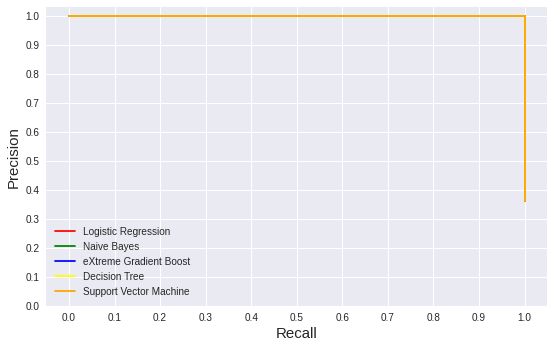

In [547]:
from sklearn.metrics import precision_recall_curve
precision1, recall1, thresholds1 = precision_recall_curve(y_test, pred_prob1[:,1])
precision2, recall2, thresholds2 = precision_recall_curve(y_test, pred_prob2[:,1])
precision3, recall3, thresholds3 = precision_recall_curve(y_test, pred_prob3[:,1])
precision5, recall5, thresholds5 = precision_recall_curve(y_test, pred_prob5[:,1])
precision6, recall6, thresholds6 = precision_recall_curve(y_test, pred_prob6[:,1])
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall1, precision1, color='red',label='Logistic Regression')
ax.plot(recall2, precision2, color='green',label='Naive Bayes')
ax.plot(recall3, precision3, color='blue',label='eXtreme Gradient Boost')
ax.plot(recall5, precision5, color='yellow',label='Decision Tree')
ax.plot(recall6, precision6, color='orange',label='Support Vector Machine')

#add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.legend(loc='best')
plt.savefig('PR',dpi=300)

#display plot
plt.show()